In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

We should run the code above. The output path should be added in pd.read_csv(' ') like below.

In [ ]:
data=pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')

Use head() function for the first 5 row of data. In this way, we can have an idea about data. If you want to see more than 5 rows, you can add parameters like head(10)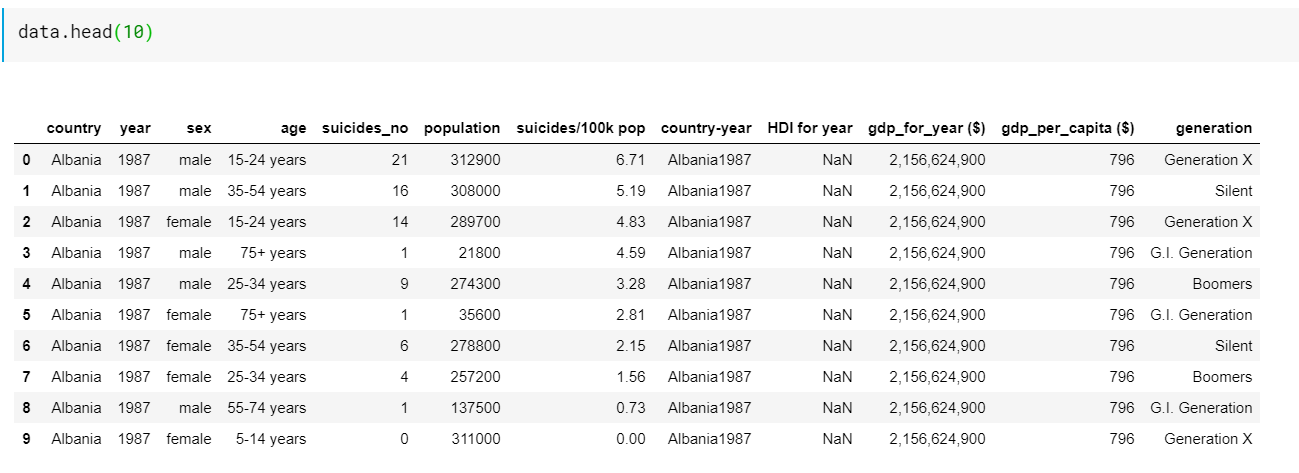

In [ ]:
data.head()

We can use info() for more detail like column names, data types, memory usage, data count. We have 12 columns, 27820 rows and 3 different data types

In [ ]:
data.info() 

Column names are our features. We use corr() to easily understand the relationship of features with each other. If it is close to 1, it means there is positive relation between features. So these two features are directly proportional. However if it is close to -1, it means negative relation. 0 means that there is no relation between them.

In [ ]:
data.corr()

We can also show this with a correlation map. We need to matplotlib and seaborn libraries. 
* figsize means heatmap size. You can use whatever size you want.
* annot parameter means whether numbers appear on heatmap.
* fmt means how many digits to use for numbers.
* if you want, you can use a different colormap with the parameter cmap="YlGnBu"


In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=.4, fmt='.2f',ax=ax)

#f,ax=plt.subplots(figsize=(15,15))
#sns.heatmap(data.corr(),annot=True,linewidths=.5,cmap="YlGnBu", fmt='.1f',ax=ax)

In [ ]:
data.columns

For data visualization with the matplotlib library, line plot, scatter plot and histogram are mostly used. If the x-axis is time, it makes more sense to use a line plot. We use scatter plot to see the relation between the two features and histogram to see the frequency of the data.

In [ ]:
#line plot
plt.plot(data.year,data.population, color="red", label="suicide")
#data.year is x label,data.population is y label
#if one label not specified, x label will be index of the data frame automatically. 

plt.xlabel("year")
plt.ylabel("population")
plt.title("year-population")
plt.legend()

plt.show

In [ ]:
#another line plot
data.year.plot(kind = 'line', color = 'g',label = 'year',linewidth=1,alpha = 0.8,grid = True,linestyle = ':')
#alpha =opacity
plt.legend(loc='upper right') #loc= location
plt.ylabel('years')
plt.xlabel('index')
plt.title('Line Plot-year') #figure title
plt.show()
#if you want, you can add different features with different color lines or linestyles

In [ ]:
#scatter plot
data.plot(kind='scatter', x='year', y='population',alpha = 0.4,color = 'red')
#also you can do like this, it's the same
#plt.scatter(data.year,data.population,color="red",label="scatter",alpha = 0.4)
plt.xlabel('year')
plt.ylabel('population')
plt.title('Scatter Plot')
plt.show()

In [ ]:
#histogram
data.population.plot(kind='hist',bins=30,figsize=(5,5),color='black')
#bins= number of bar in figure
#or you can do like this
#plt.hist(data.population, bins=30,color='black')
plt.show()

In [ ]:
#subplot
plt.subplot(2,1,1)
plt.plot(data.year, color="red",label="year")
plt.ylabel("year")
# there are 2 columns. Second row of first column
plt.subplot(2,1,2) 
plt.plot(data.population,color="green",label="population")
plt.ylabel("population")

In [ ]:
plt.clf() #cleans the plot.

**DICTIONARIES**

Dictionaries have keys and values. Dictionary usage is as follows.

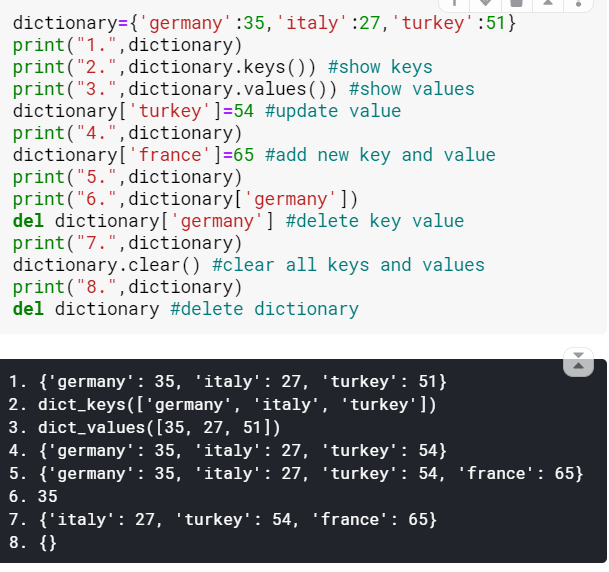


Pandas include series and data frames. It's not the same.

In [ ]:
data.head()

In [ ]:
series=data['suicides_no']
dataFrame= data[['suicides_no']]

print("dataFrame" ,type(dataFrame))

print("series" ,type(series))

In [ ]:
print(dataFrame)
print("--------")
print(series)

Sometimes, we need to filter. So we use some operators. Basic examples is as below.

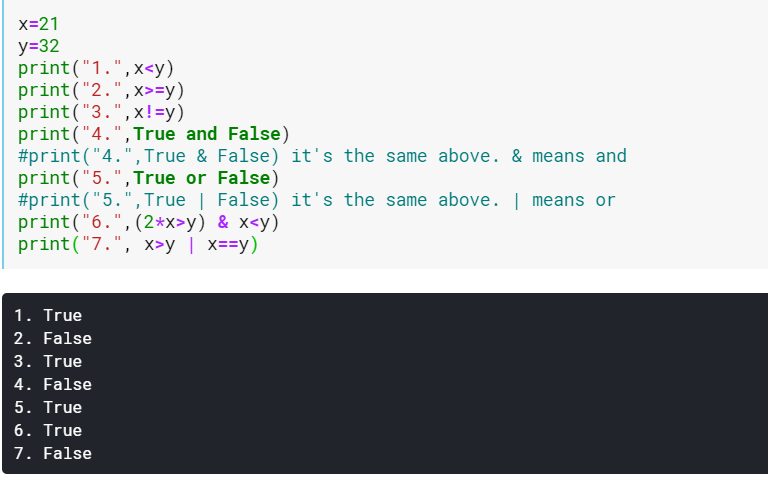


In [ ]:
data[(data['suicides_no']>9000) & (data['year']>2010 )]
#show suicides_no greater than 9000 and  year greater than 2010 from the data

#y=data['year']>2010
#s=data['suicides_no']>9000
#data[s&y]

In [ ]:
print(data['suicides_no'][0])
print(data['suicides_no'][1])
print(data['suicides_no'][0]>=data['suicides_no'][1])

In [ ]:
data[(data['sex']=='male') & (data['year']>=2015 )]

**LOOPS**

While loop example:

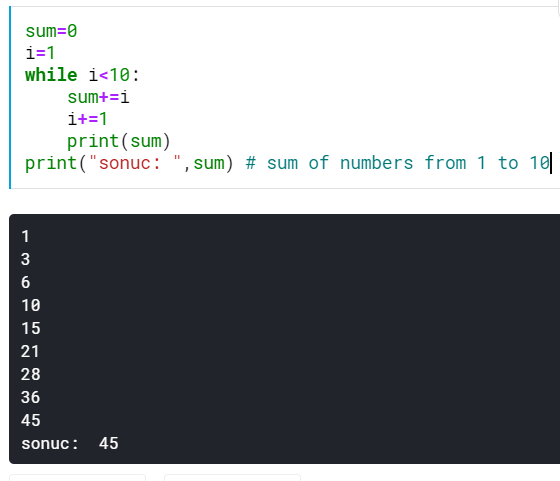

For loop example:

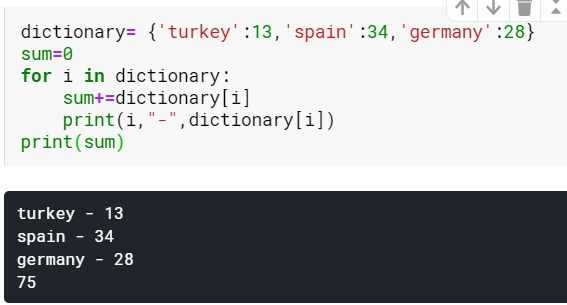


In [ ]:
albaniaCount=0 # albania count in data
others=0 #other countries count in data
for i in data['country']:
    if i=='Albania':
        albaniaCount+=1
    else:
        others+=1
print("Ratio of Albania to other countries= ",albaniaCount/others)

In [ ]:
for index,value in data[['generation']][-5:].iterrows():
    print(index," : ",value) 
    #last 5 values and index

In [ ]:
data['country'].unique() #all different countries

In [ ]:
dic={} #create empty dictionary
for each in data['country'].unique(): 
    dic[each]=0 #all different countries are our keys and all values are zero

for i in data['country']:
    dic[i]+=1 #return all country data, increase own value for each country.

for key,value in dic.items():
    print(key,":",value) #all keys and values

#print(dic)    

In [ ]:
lis=[]
for each in data['generation'].unique(): #different generations
    lis.append(each) # add this generations to list
    
for index, value in enumerate(lis):
    print(index,":",value)


**USER DEFINED FUNCTION**

* We use def when creating a function. 
* Docstring should be used to make it understandable to others about what the function does. It's like """command"""

For example

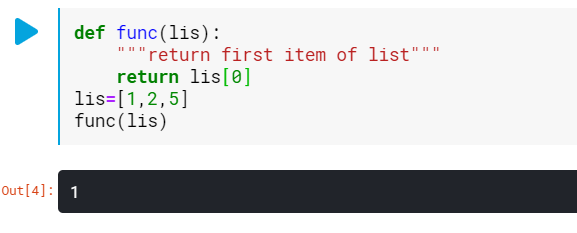
    

**SCOPE**

Variables can be global, local, built in scope. 

Global variables defined main body but local variables defined in functions.Local ones can only be accessed within the function, global ones can be accessed from anywhere. If a variable is defined differently in the main body and function, it is used local one within the defined function. Built in scope is predefined, such as print, len. If you want to take a look at all;


In [ ]:
#built in scope
import builtins 
dir(builtins)

In [ ]:
sex="male" #global scope

def female():
    """show sex variable"""
    sex="female" #local scope
    print(sex)
if data.sex[2] =="female":
    female()
print("...")
print(sex)

In [ ]:
sex="female" #global scope

def female(): #there is no local scope
    """show sex variable"""
    print(sex)
if data.sex[2] =="female":
    female()

**NESTED FUNCTIONS**

it is means create a function inside another function.

In [ ]:
def albania(): #first function
    """return ratio of suicide numbers to years of Albania"""
    def albaniaSuicide(): #second function inside first func.
        """return sum of suicide numbers in data"""
        summ=0
        for index, value in enumerate(data["country"]):
            if value=="Albania": #if the country is Albania
                summ+=data.suicides_no[index] #then add the number of suicides in that index
        return summ 
    year=len(data['year'].unique()) #1985-2016
    return albaniaSuicide()/year
        
albania()  

**DEFAULT and FLEXIBLE ARGUMENTS**

def func(a,b=5): #b=5 is default argument

def func(*args): #When we want to send different number of parameters to the same function, we use  *args instead of creating a new function.

if the argument is *kwargs, parameters should be dictionary.


In [ ]:
#default arguments
def sexRatio(a=3): #a=3 default argument, a is number of digits after comma
    """show the suicide ratio of female to male in the world"""
    dictionary={"male":0,"female":0}
    for index,value in enumerate(data["sex"]):
        dictionary[value]+=data["suicides_no"][index]
    print("ratio of female to male: " ,round(dictionary["female"]/dictionary["male"],a))
    
sexRatio() # used default argument(a=3)
sexRatio(1) # used a=1

In [ ]:
def show(country,*args): #flexible argument
    """print some details about suicide"""
    print("country:",country)
    print("other details: ")
    for i in args:
        print(i)
for i in [1,2,3]:   
    show(data["country"][i],data["age"][i],data["population"][i])
#different number of parameters
for i in [1,2,3]:   
    show(data["country"][i],data["age"][i])    

In [ ]:
def x(**kwargs):
    """ print key and value of dictionary"""
    for key, value in kwargs.items():            
        print(key, ":", value,".")
for i in [1,2,3]:   
    x(year = data["year"][i], suicides_no = data["suicides_no"][i])

**LAMBDA FUNCTION**

Lambda functions allow us to write functions in one line.

In [ ]:
rate= lambda x,y: x/y #x,y are names of arguments
print(rate(data["suicides_no"][5],data["population"][5]))

**ANONYMOUS FUNCTION**

It's like a lambda function but you can apply the function to multiple items with this.

map(function,items(ex. list, series)) 

In [ ]:
y = map(lambda x:round(x,-1),data.suicides_no)
print(list(y)[:15]) #first 15 items

**zip() and unzip()**

zip(), combines by indexes.

unzip(), separates by indexes.

In [ ]:
years=[2000,2001,2002,2003]
suicides_no=[]

for each in years:
    s=0
    x=data['year']==each
    s=sum(data[x].suicides_no) #sum all suicide numbers each year
    suicides_no.append(s) # add list  
#zip        
z=zip(years,suicides_no) 
print(type(z))
list_z=(list(z)) #convert list
print(list_z)
print(".....")

#unzip
un_z=zip(*list_z)
un_1,un_2=list(un_z)
print(un_1)
print(un_2)

**LIST COMPREHENSION**

List comprehension is a structure that saves us from writing unnecessary long code. It provides if and for loop usage in a single line.

In [ ]:
x=data.suicides_no
y=["too much" if i>50 else "much" if i>10 else "normal" for i in x]
print(y[:50])